# Call API to get data of the current season  myself, the top player in Nepal and the top player in the world.

In [1]:
import requests
import json
import pandas as pd
players = {"Ankur":6768303, "Nepal#1":2669770, "World#1":158332}
for key in players.keys():
    api = f"https://fantasy.premierleague.com/api/entry/{players[key]}/history/"
    response = requests.get(api) #Get API
    data = pd.json_normalize(response.json()["current"]) #Normalize JSON to datafram
    data.to_csv(f'{key}.csv',index=False) #Create CSV of data
data

,event,points,total_points,rank,rank_sort,overall_rank,bank,value,event_transfers,event_transfers_cost,points_on_bench
0,1,75,75,633353,635738,633353,0,1000,0,0,6
1,2,59,134,4090673,4092464,1356117,0,1003,0,0,7
2,3,42,172,7052551,7052941,2914426,1,1006,3,4,8
3,4,82,254,999533,999984,1235355,5,1007,1,0,5
4,5,84,338,764071,765971,686659,0,1009,1,0,3
5,6,40,378,6610236,6612208,949108,0,1013,0,0,16
6,7,0,378,6582907,6632320,941323,8,1014,1,0,0
7,8,78,456,196482,196546,227706,2,1017,1,0,6
8,9,112,568,34225,34333,23173,4,1020,1,0,4
9,10,83,651,183753,184070,8032,12,1024,2,0,7


# Calculate some basic insights

In [2]:

names = []
sums =[]
means = []
medians = []
modes = []

for key in players.keys():
    df = pd.read_csv(f'{key}.csv')
    names.append(key)
    columns = ["points"]
    sums.append(df[columns].sum().values[0])
    means.append(df[columns].mean().values[0])
    medians.append(df[columns].median().values[0])
    modes.append(df[columns].mode().iloc[0].values[0])

table = pd.DataFrame({"Name":names,"Sum of points":sums, "Average":means,"Median":medians,"Mode":modes})
table.set_index("Name")
table

,Name,Sum of points,Average,Median,Mode
0,Ankur,2355,61.973684,58.0,56
1,Nepal#1,2703,71.131579,65.0,61
2,World#1,2812,74.000000,76.5,59


# Let's look at it visually

## Points Per Gameweek for each player separately

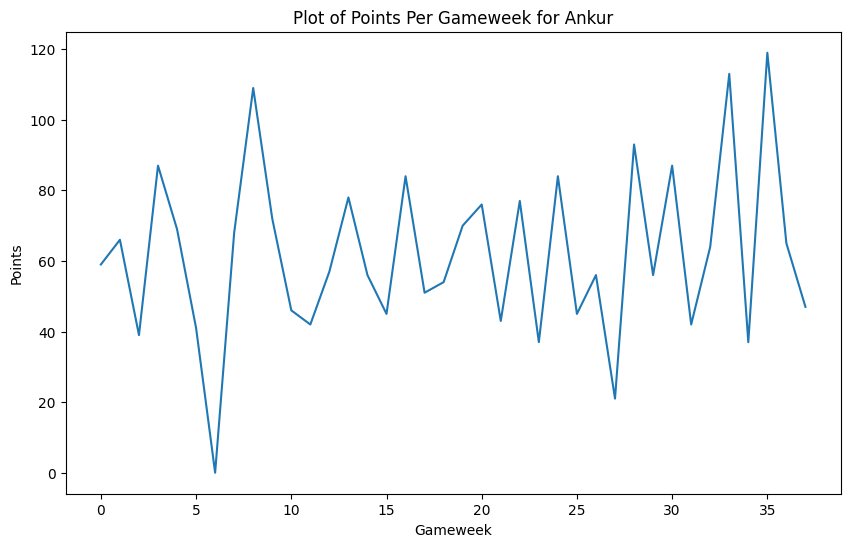

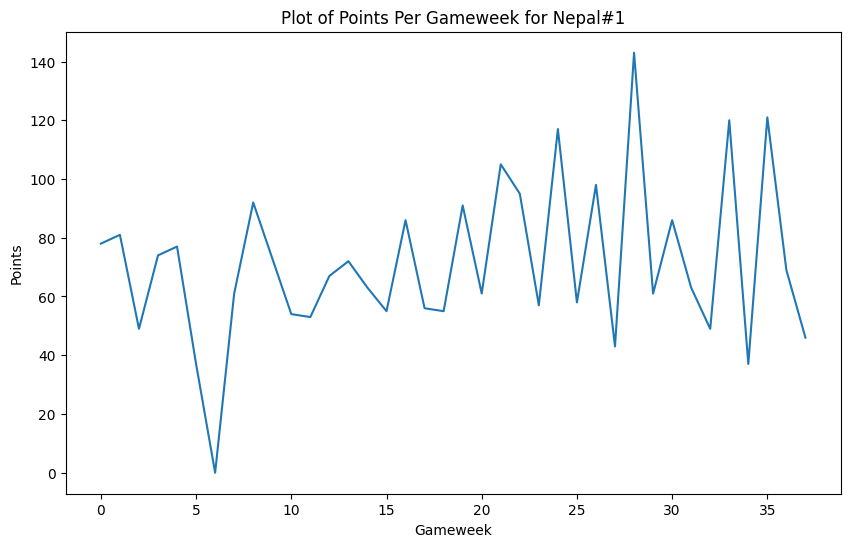

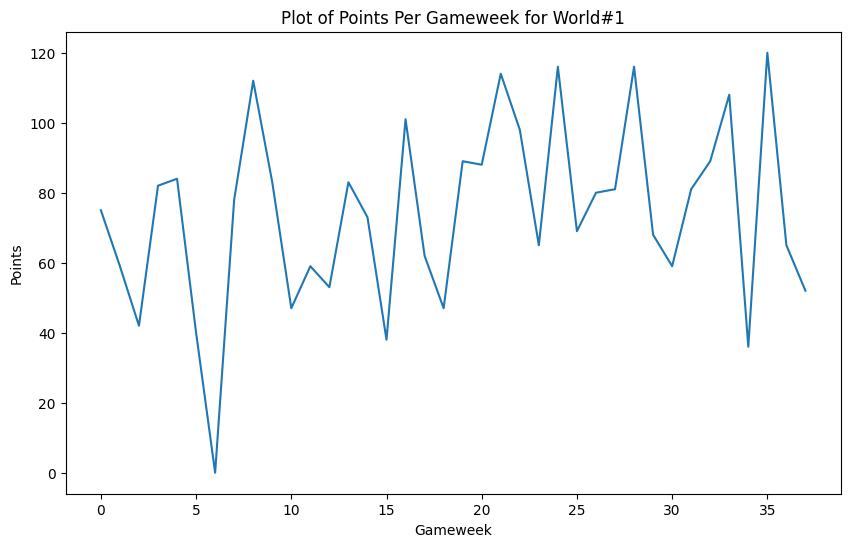

In [19]:
import matplotlib.pyplot as plt

for key in players.keys():
    df = pd.read_csv(f'{key}.csv')
    plt.figure(figsize=(10, 6))
    plt.plot(df["points"])
    plt.xlabel("Gameweek")
    plt.ylabel("Points")
    plt.title(f"Plot of Points Per Gameweek for {key}")
    plt.savefig(f'{key}-points.png')
    plt.show()

## Ranking per gameweek

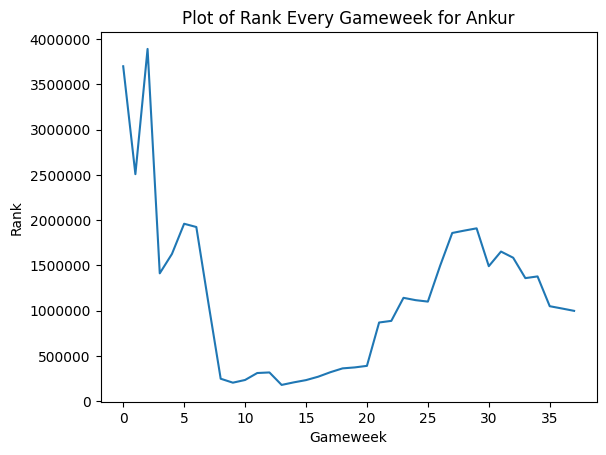

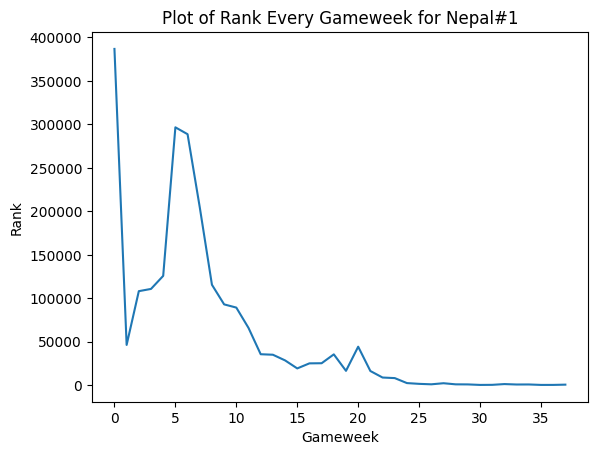

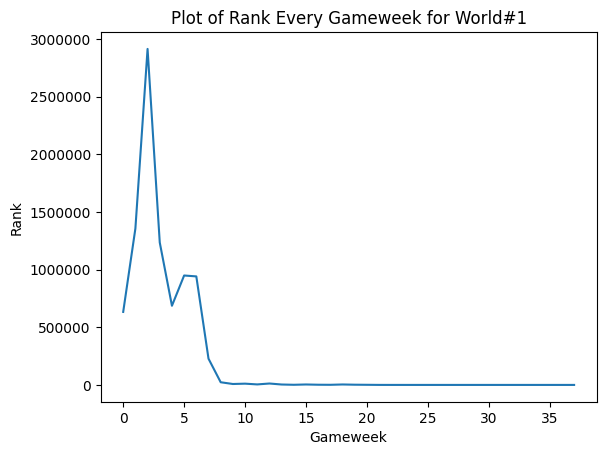

In [20]:
for key in players.keys():
    df = pd.read_csv(f'{key}.csv')
    plt.plot(df["overall_rank"])
    plt.ticklabel_format(style='plain', axis='y')
    plt.xlabel("Gameweek")
    plt.ylabel("Rank")
    plt.savefig(f'{key}-ranking.png')
    plt.title(f"Plot of Rank Every Gameweek for {key}")
    plt.show()